In [2]:
%matplotlib inline
from sklearn import preprocessing

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

pwd='G:/One Drive/OneDrive/MSBA/kaggle/will_bill_solve_it.tar/will_bill_solve_it'
trainProblems=pd.read_csv(pwd+'/train/problems.csv')
trainSubmissions=pd.read_csv(pwd+'/train/submissions.csv')

testProblems=pd.read_csv(pwd+'/test/problems-test.csv')
testUsers=pd.read_csv(pwd+'/test/users-test.csv')

In [5]:
trainUsers=pd.read_csv(pwd+'/train/users.csv')

# Handling missed values and removing few columns

In [36]:
trainProblems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1001
Data columns (total 7 columns):
problem_id      1002 non-null int64
level           768 non-null object
accuracy        1002 non-null float64
solved_count    1002 non-null int64
error_count     1002 non-null int64
rating          1002 non-null float64
tag1            1002 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


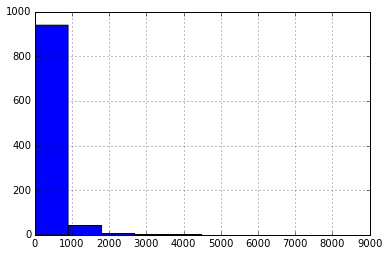

In [33]:
trainProblems.solved_count.hist()

In [51]:
trainProblems[pd.isnull(trainProblems.level)].describe() #groupby('solved_count')['problem_id'].count()
trainProblems.groupby('level')['solved_count'].mean()

level
E      532.545198
E-M    190.196970
H       31.541667
M      114.938017
M-H     40.400000
Name: solved_count, dtype: float64

75 % of solved_count data lies in the range of 21-130 for missing level values. Also Medium levels has on an average 114 solved_count. Hence setting missing level values to M difficulty based on the data

In [6]:
testProblems.level.fillna('M',inplace=True)
trainProblems.level.fillna('M',inplace=True)

In [9]:
testProblems=testProblems.drop(['tag2','tag3','tag4','tag5','accuracy'],axis=1)
trainProblems=trainProblems.drop(['tag2','tag3','tag4','tag5','accuracy'],axis=1)

In [10]:
testProblems.tag1.fillna('no value',inplace=True)
trainProblems.tag1.fillna('no value',inplace=True)

In [ ]:
testProblems.groupby('tag1')['problem_id'].count()
trainProblems.groupby('tag1')['problem_id'].count()

In [114]:
testProblems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 955
Data columns (total 6 columns):
problem_id      956 non-null int64
level           956 non-null object
solved_count    956 non-null int64
error_count     956 non-null int64
rating          956 non-null float64
tag1            956 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 44.8+ KB


# marking test and train data and combining the data for cleaning

In [11]:
trainUsers['recordtype']='train'
testUsers['recordtype']='test'

In [12]:
fullUsers=pd.concat([trainUsers,testUsers])

In [73]:
fullUsers.describe()

,user_id,solved_count,attempts
count,77809.000000,77809.000000,77809.000000
mean,1155162.355576,10.657071,15.608117
std,177017.284906,26.594750,49.933960
min,903633.000000,0.000000,0.000000
25%,997644.000000,1.000000,2.000000
50%,1123249.000000,3.000000,5.000000
75%,1315405.000000,9.000000,16.000000
max,1556984.000000,789.000000,7211.000000


In [75]:
fullUsers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77809 entries, 0 to 15278
Data columns (total 6 columns):
user_id         77809 non-null int64
skills          77550 non-null object
solved_count    77809 non-null int64
attempts        77809 non-null int64
user_type       42674 non-null object
recordtype      77809 non-null object
dtypes: int64(3), object(3)
memory usage: 3.3+ MB


In [80]:
fullUsers.groupby('user_type')['attempts'].median()

user_type
S    11
W     6
Name: attempts, dtype: int64

In [13]:
fullUsers.user_type.fillna('W',inplace=True)

In [14]:
testUsersCleaned=fullUsers.loc[fullUsers['recordtype']=='test',]
trainUsersCleaned=fullUsers.loc[fullUsers['recordtype']=='train',]

In [119]:
trainUsersCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62530 entries, 0 to 62529
Data columns (total 6 columns):
user_id         62530 non-null int64
skills          62271 non-null object
solved_count    62530 non-null int64
attempts        62530 non-null int64
user_type       62530 non-null object
recordtype      62530 non-null object
dtypes: int64(3), object(3)
memory usage: 2.6+ MB


In [15]:
trainSubmissions['solved']=0

In [16]:
mask=(trainSubmissions['solved_status']=='SO') & (trainSubmissions['result']=='AC')

In [17]:
trainSubmissions.loc[mask,'solved']=1

In [18]:
trainSubmissions=trainSubmissions.drop(['solved_status','result','language_used','execution_time'],axis=1)

In [132]:
trainSubmissions.head()

,user_id,problem_id,solved
0,1056149,918786,0
1,1056149,918786,1
2,1347625,909223,1
3,967099,936829,1
4,924192,916333,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113201B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12E3D930>]], dtype=object)

C:\Users\abhil\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


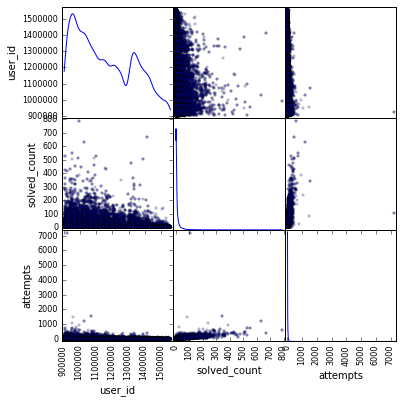

In [78]:
pd.tools.plotting.scatter_matrix(fullUsers, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [19]:
trainMerged=pd.merge(trainSubmissions,trainProblems, left_on='problem_id', right_on='problem_id', how='inner')
trainMerged=pd.merge(trainMerged, trainUsersCleaned, left_on='user_id', right_on='user_id', how='inner')
trainMerged.shape

(1048575, 13)

In [20]:
trainMerged=trainMerged.drop(['solved_status','result','recordtype','execution_time','language_used'],axis=1)

ValueError: labels ['solved_status' 'result' 'execution_time' 'language_used'] not contained in axis

In [21]:
trainMerged.head()

,user_id,problem_id,solved,level,solved_count_x,error_count,rating,tag1,skills,solved_count_y,attempts,user_type,recordtype
0,1056149,918786,0,E,755,1071,3.4,Ad-Hoc,Python|C|Java|C++,217,118,W,train
1,1056149,918786,1,E,755,1071,3.4,Ad-Hoc,Python|C|Java|C++,217,118,W,train
2,1056149,909223,1,E,1691,1465,2.6,no value,Python|C|Java|C++,217,118,W,train
3,1056149,913738,0,E,2241,8197,4.0,Implementation,Python|C|Java|C++,217,118,W,train
4,1056149,913738,1,E,2241,8197,4.0,Implementation,Python|C|Java|C++,217,118,W,train


In [148]:
target = [x[2] for x in trainMerged]
train = [x[1:] for x in trainMerged]

In [24]:
trainMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
user_id           1048575 non-null int64
problem_id        1048575 non-null int64
solved            1048575 non-null int64
level             1048575 non-null object
solved_count_x    1048575 non-null int64
error_count       1048575 non-null int64
rating            1048575 non-null float64
solved_count_y    1048575 non-null int64
attempts          1048575 non-null int64
user_type         1048575 non-null object
dtypes: float64(1), int64(7), object(2)
memory usage: 80.0+ MB


In [36]:
trainMerged.user_id=trainMerged.user_id.astype('int32')
trainMerged.problem_id=trainMerged.problem_id.astype('int32')
trainMerged.solved=trainMerged.solved.astype('int32')
trainMerged.solved_count_x=trainMerged.solved_count_x.astype('int32')
trainMerged.error_count=trainMerged.error_count.astype('int32')
trainMerged.rating=trainMerged.rating.astype('float32')
trainMerged.solved_count_y=trainMerged.solved_count_y.astype('int32')
trainMerged.attempts=trainMerged.attempts.astype('int32')

In [37]:
features = [u'user_id', u'problem_id', u'level', u'solved_count_x',
       u'error_count', u'rating', u'solved_count_y', u'attempts',
       u'user_type']

In [38]:
y, _ = pd.factorize(trainMerged['solved'])

In [25]:
le_level = preprocessing.LabelEncoder()
#to convert into numbers
trainMerged.level = le_level.fit_transform(trainMerged.level)

In [26]:
le_type = preprocessing.LabelEncoder()
#to convert into numbers
trainMerged.user_type = le_type.fit_transform(trainMerged.user_type)

In [23]:
trainMerged=trainMerged.drop(['tag1','skills','recordtype'],axis=1)

In [ ]:
rf = RandomForestClassifier(n_estimators=30)
rf.fit(trainMerged[features], y)